# Build a Model in TensorFlow

In [1]:
# loading packages
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
print(" tensorflow: {} \n numpy: {}".format(tf.__version__, np.__version__))

 tensorflow: 2.9.1 
 numpy: 1.23.1


## Example: XOR problem

|$x_1$|$x_2$|$y$|
|:-:|:-:|:-:|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

In [2]:
# Data
x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]], dtype=np.float32)
y = np.array([0, 0, 0, 1]).reshape(-1, 1)
print(f'Shape of Input = {x.shape}, Shape of Output = {y.shape}')

Shape of Input = (4, 2), Shape of Output = (4, 1)


### Sequential API

* [`tf.keras.models.Sequential`](https://www.tensorflow.org/guide/keras/sequential_model?hl=ko): appropriate for a **plain stack** of layers where each layer has exactly one input tensor and one output tensor.
* [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
* [`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
* [`tf.keras.optimizers.SGD`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD)

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', use_bias=True),
    tf.keras.layers.Dense(units=1, activation='sigmoid', use_bias=True)
])
loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.1)
model.compile(optimizer=optimizer, loss=loss_func)
hist = model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 443ms/step - loss: 0.7093
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.6845
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 0.6612
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6414
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6248
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6109
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5990
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5890
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5804
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5730
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5667
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5611
Epoch 13/500
1/1 [==============================] - 0s 2ms/

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [5]:
# predict the data
def predict(model, x):
    pred = model.predict(x)  # probability
    pred = tf.greater_equal(pred, 0.5)  # if greater or equal than 0.5 > True, otherwise False
    return tf.cast(pred, dtype=tf.int8).numpy()  # type casting to integer and to numpy

y_pred = predict(model, x)
print(y_pred)

1/1 [==============================] - 0s 39ms/step
[[0]
 [0]
 [0]
 [1]]


### Functional API

In [6]:
inputs = tf.keras.Input(shape=(2,))
z = tf.keras.layers.Dense(units=2, activation='sigmoid', use_bias=True)(inputs)
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid', use_bias=True)(z)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.1)
model.compile(optimizer=optimizer, loss=loss_func)
hist = model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 149ms/step - loss: 0.6007
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5955
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5903
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5856
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5815
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5777
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5744
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5713
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5685
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5659
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5635
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5613
Epoch 13/500
1/1 [==============================] - 0s 9ms/

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
y_pred = predict(model, x)
print(y_pred)

1/1 [==============================] - 0s 25ms/step
[[0]
 [0]
 [0]
 [1]]


### Subclassing API

In [9]:
class CustomModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.linear1 = tf.keras.layers.Dense(units=2, activation='sigmoid', use_bias=True)
        self.linear2 = tf.keras.layers.Dense(units=1, activation='sigmoid', use_bias=True)
        
    def call(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        return x
        
model = CustomModel()

loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.1)
model.compile(optimizer=optimizer, loss=loss_func)
hist = model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 171ms/step - loss: 0.6061
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.6051
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 0.6040
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6031
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6022
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6013
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6006
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5998
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5991
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5984
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5978
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5971
Epoch 13/500
1/1 [==============================] - 0s 5ms/

## TODO: MNIST Training

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print(f'Train data shape = {x_train.shape}')
print(f'Test data shape = {x_test.shape}')

Train data shape = (60000, 28, 28)
Test data shape = (10000, 28, 28)


### Sequential API

```python
# last year
tf.keras.layers.Dense(units=10, activation='softmax', use_bias=True)
# loss
tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
# ----------------------------------------------------------------------
# equals to
# ----------------------------------------------------------------------
# last year
tf.keras.layers.Dense(units=10, activation=None, use_bias=True)
# loss
tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
```

* [`tf.keras.layers.Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)
* [`tf.keras.losses.SparseCategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    # 2 Dense Layer
    # 1st: output_size = 100, activation = relu
    # 2nd: output_size = 10
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

# Set SparseCategoricalCrossentropy: from_logits=True
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=10, batch_size=64)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3172 - accuracy: 0.9108
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1501 - accuracy: 0.9580
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1066 - accuracy: 0.9687
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0817 - accuracy: 0.9763
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0655 - accuracy: 0.9805
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0540 - accuracy: 0.9838
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0434 - accuracy: 0.9876
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0368 - accuracy: 0.9890
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0304 - accuracy: 0.9911
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0256 - accuracy: 0.9927

[0.08140260726213455, 0.9760000109672546]

### Subclassing API

In [14]:
class CustomModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        # 2 Dense Layer
        # 1st: output_size = 100, activation = relu
        # 2nd: output_size = 10, activation = softmax
        self.linear1 = tf.keras.layers.Dense(units=100, activation='relu')
        self.linear2 = tf.keras.layers.Dense(units=10, activation='softmax')

    def call(self, x):
        # forward propagation
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.linear2(x)
        return x
        
model = CustomModel()
# Set SparseCategoricalCrossentropy: from_logits=False
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=10, batch_size=64)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3231 - accuracy: 0.9092
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1523 - accuracy: 0.9557
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1075 - accuracy: 0.9692
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0837 - accuracy: 0.9751
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0672 - accuracy: 0.9801
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0543 - accuracy: 0.9840
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0447 - accuracy: 0.9868
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0379 - accuracy: 0.9888
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0325 - accuracy: 0.9903
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0275 - accuracy: 0.9924

[0.08037828654050827, 0.9763000011444092]

## Model Saveing and Loading

https://www.tensorflow.org/tutorials/keras/save_and_load?hl=ko

In [5]:
from pathlib import Path

checkpoint_path = Path('./checkpoints/mymodel')
model.save(str(checkpoint_path))

INFO:tensorflow:Assets written to: checkpoints\mymodel\assets


In [6]:
new_model = tf.keras.models.load_model(str(checkpoint_path))
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## tf.GradientTape

<img src="http://drive.google.com/uc?export=view&id=1ZRAUVozDgH7-4PifPIzI7j15VHXsz8UR" width="890px" height="480px" >

draw a computational graph, just to know how it works in backend

$$\begin{aligned}
c(a, b) &= a + b\\
d(b) &= 2\times b + 1\\
e(c, d) &= c\times d 
\end{aligned} \\ \ \\ \text{where } a=2, b=3$$

In [45]:
a = tf.Variable(2.0)
b = tf.Variable(3.0)

with tf.GradientTape() as tape:
    tape.watch([a, b])  # track a and b
    c = a + b
    d = tf.constant(2.0)*b + tf.constant(1.0)
    e = c * d
    print(f'e = {e}')
grads = tape.gradient(e, [a, b])
print(f'gradient for a = {grads[0]}')
print(f'gradient for b = {grads[1]}')

e = 35.0
gradient for a = 7.0
gradient for b = 17.0


### XOR Problem

```python
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# tf.GradientTape is working
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])  
hist = model.fit(x_train, y_train, epochs=10, batch_size=64)
model.evaluate(x_test, y_test, verbose=2)
```

In [47]:
# Data
x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]], dtype=np.float32)
y = np.array([0, 0, 0, 1]).reshape(-1, 1)
print(f'Shape of Input = {x.shape}, Shape of Output = {y.shape}')
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid'),
    tf.keras.layers.Dense(units=1)
])
# Loss Function
loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# Get Gradient
with tf.GradientTape() as tape:
    outputs = model(x)
    loss = loss_func(y, outputs)
    gradients = tape.gradient(loss, model.trainable_variables)
print(f'type of gradients: {type(gradients)}')

for g, w in zip(gradients, model.trainable_variables):
    print(f'weights: {w.name}')
    print(f'{w.numpy()}')
    print(f'gradients:')
    print(f'{g.numpy()}')
    print()
optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Shape of Input = (4, 2), Shape of Output = (4, 1)
type of gradients: <class 'list'>
weights: dense_20/kernel:0
[[ 0.09445214 -0.7989141 ]
 [-0.11692774  0.18632054]]
gradients:
[[-2.0185718e-05 -1.8698303e-04]
 [-5.1935436e-05  4.5452570e-04]]

weights: dense_20/bias:0
[0. 0.]
gradients:
[-0.0040065   0.00831215]

weights: dense_21/kernel:0
[[-0.06264806]
 [ 0.13392115]]
gradients:
[[0.12818432]
 [0.12878297]]

weights: dense_21/bias:0
[0.]
gradients:
[0.25650972]



<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=9384>

## Try to test by yourself

### LMS Cloud

In [26]:
# not avaliable in VSCode
from IPython.display import HTML
HTML(open("./input.html").read())

# will read the picture as 'data' variable
# np.array(data)

In [ ]:
def predict(model, x):
    pred = model.predict(x)
    pred = tf.argmax(pred, axis=1)  
    return pred.numpy()

checkpoint_path = Path('./checkpoints/mymodel')
our_model = tf.keras.models.load_model(str(checkpoint_path))
x = np.array(data) / 255.0
plt.imshow(x, cmap='gray')
plt.axis('off')
plt.show()

print(f'Shape of Input = {x.shape}')
pred = predict(our_model, x)
print(f'Prediction = {pred}')

In [ ]:
# For Local Machine

from PIL import ImageDraw
import PIL
from tkinter import *

width = 200  # canvas width
height = 200 # canvas height
center = height//2
white = (0, 0, 0) # canvas back

def save():
    # save image to hard drive
    filename = "drawing.png"
    output_image.save(filename)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="white",width=5)
    draw.line([x1, y1, x2, y2],fill="white",width=5)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

In [22]:
from pathlib import Path
import tensorflow as tf
import numpy as np
import PIL
import matplotlib.pyplot as plt

def load_image(filename="drawing.png"):    
    img = PIL.Image.open(filename)
    img.thumbnail((28, 28), PIL.Image.Resampling.LANCZOS)
    x = np.array(img)[:, :, -1] / 255.0
    plt.imshow(x, cmap='gray')
    plt.axis('off')
    plt.show()
    return x[np.newaxis, :, :]

def predict(model, x):
    pred = model.predict(x)
    pred = tf.argmax(pred, axis=1)  
    return pred.numpy()

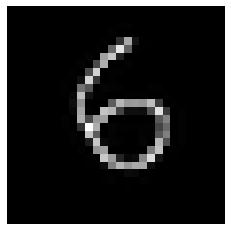

Shape of Input = (1, 28, 28)
1/1 [==============================] - 0s 25ms/step
Prediction = [6]


In [25]:
checkpoint_path = Path('./checkpoints/mymodel')
our_model = tf.keras.models.load_model(str(checkpoint_path))
x = load_image(filename='drawing.png')
print(f'Shape of Input = {x.shape}')
pred = predict(our_model, x)
print(f'Prediction = {pred}')